In [453]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# This library will be required for label encodings for car company name
from sklearn.preprocessing import LabelEncoder

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import scale

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [454]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')

In [455]:
# Import the data - read the csv file and view the data.

loan_df = pd.read_csv("train.csv", low_memory=False)
loan_df.head(100)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.5500,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.2300,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.6300,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.4800,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.3900,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.6600,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.4200,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.8900,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.5600,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.9500,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [456]:
loan_df.shape

(233154, 41)

In [457]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [458]:
loan_test_df = pd.read_csv("test_bqCt9Pv.csv", low_memory=False)
loan_test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.5400,67,22807,45,1497,01-01-74,Salaried,03-11-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.4500,67,22807,45,1497,20-05-85,Self employed,20-11-18,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.9300,78,23135,86,2071,14-10-95,Salaried,29-11-18,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.5800,78,17014,45,2070,01-06-73,Self employed,29-11-18,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.0800,78,17014,45,2069,01-06-72,Salaried,17-11-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [459]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

loan_df['branch_id'] = loan_df['branch_id'].astype('category')
loan_df['manufacturer_id'] = loan_df['manufacturer_id'].astype('category')
loan_df['State_ID'] = loan_df['State_ID'].astype('category')

loan_df['branch_id'] = le.fit_transform(loan_df['branch_id'])
loan_df['manufacturer_id'] = le.fit_transform(loan_df['manufacturer_id'])
loan_df['State_ID'] = le.fit_transform(loan_df['State_ID'])

loan_test_df['branch_id'] = loan_test_df['branch_id'].astype('category')
loan_test_df['manufacturer_id'] = loan_test_df['manufacturer_id'].astype('category')
loan_test_df['State_ID'] = loan_test_df['State_ID'].astype('category')


loan_test_df['branch_id'] = le.fit_transform(loan_test_df['branch_id'])
loan_test_df['manufacturer_id'] = le.fit_transform(loan_test_df['manufacturer_id'])
loan_test_df['State_ID'] = le.fit_transform(loan_test_df['State_ID'])

In [460]:
test_uniqueID = loan_test_df[['UniqueID']]
test_uniqueID.head()

,UniqueID
0,655269
1,723482
2,758529
3,763449
4,708663


In [461]:
loan_df['Employment.Type'].isnull().sum()

7661

In [462]:
loan_test_df['Employment.Type'].isnull().sum()

3443

In [463]:
loan_df['Employment.Type'].fillna("Unemployed", inplace = True) 

In [464]:
loan_test_df['Employment.Type'].fillna("Unemployed", inplace = True) 

In [465]:
loan_df['Employment.Type'] = loan_df['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
loan_test_df['Employment.Type'] = loan_test_df['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

In [466]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        233154 non-null int64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                    

In [467]:
loan_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        112392 non-null int64
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                    

In [468]:
loan_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000,233154.0000
mean,535917.5734,54356.9935,75865.0681,74.7465,30.4388,19638.6350,3.1722,3396.8802,1.5146,6.2622,1549.4771,1.0000,0.8403,0.0756,0.1449,0.0232,0.0021,289.4630,2.4406,1.0399,0.1565,165900.0769,218503.8553,218065.8987,0.0591,0.0277,0.0072,5427.7928,7295.9233,7179.9979,13105.4817,323.2684,0.3818,0.0975,0.2066,0.2171
std,68315.6937,12971.3142,18944.7813,11.4566,23.4721,3491.9496,2.1921,2238.1475,0.5617,4.4822,975.2613,0.0000,0.3663,0.2643,0.3520,0.1507,0.0461,338.3748,5.2172,1.9415,0.5488,942273.5824,2374794.1258,2377743.8461,0.6268,0.3161,0.1111,170236.9946,183155.9931,182592.5001,151367.9047,15553.6913,0.9551,0.3844,0.7065,0.4123
min,417428.0000,13320.0000,37000.0000,10.0300,0.0000,10524.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-6678296.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-574647.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,476786.2500,47145.0000,65717.0000,68.8800,10.0000,16535.0000,1.0000,1511.0000,1.0000,3.0000,713.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,535978.5000,53803.0000,70946.0000,76.8000,24.0000,20333.0000,5.0000,2970.0000,2.0000,5.0000,1451.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,595039.7500,60413.0000,79201.7500,83.6700,54.0000,23000.0000,5.0000,5677.0000,2.0000,9.0000,2362.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,678.0000,3.0000,1.0000,0.0000,35006.5000,62500.0000,60800.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1999.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,671084.0000,990572.0000,1628992.0000,95.0000,81.0000,24803.0000,10.0000,7345.0000,2.0000,21.0000,3795.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,890.0000,453.0000,144.0000,25.0000,96524920.0000,1000000000.0000,1000000000.0000,52.0000,36.0000,8.0000,36032852.0000,30000000.0000,30000000.0000,25642806.0000,4170901.0000,35.0000,20.0000,36.0000,1.0000


In [469]:
sum(loan_df['PRI.CURRENT.BALANCE'] < 0)

448

In [470]:
loan_test_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000,112392.0000
mean,711741.8919,56076.8033,77186.3853,75.3103,32.5948,19843.3035,3.0946,3014.0014,1.5014,6.2158,1771.6515,1.0000,0.8696,0.1916,0.1210,0.0167,0.0019,288.1381,2.2272,0.9283,0.1522,148591.1675,191285.5678,191917.1729,0.0236,0.0123,0.0032,2776.0814,3721.4772,3671.1562,11236.9800,167.9060,0.3149,0.0919,0.2261
std,33492.2160,13123.6976,18271.4854,11.0064,23.9320,3555.3033,2.2241,2223.2154,0.5579,4.6798,1104.5336,0.0000,0.3367,0.3936,0.3261,0.1282,0.0437,339.8066,4.5590,1.7335,0.5318,889092.5269,1069342.9246,1077009.6445,0.3932,0.1984,0.0738,140605.9385,201551.5604,201368.6474,274124.9779,17638.4075,0.8434,0.3818,0.7392
min,654115.0000,11613.0000,40117.0000,10.0300,0.0000,10524.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2012765.0000,-481500.0000,0.0000,0.0000,0.0000,0.0000,-3882.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,682658.7500,48849.0000,67510.0000,69.9700,11.0000,16633.0000,0.0000,1312.0000,1.0000,3.0000,801.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,711522.5000,55359.0000,72584.0000,77.7800,30.0000,20675.0000,5.0000,2412.0000,2.0000,5.0000,1664.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,740851.2500,62147.0000,80040.0000,83.7400,56.0000,23170.0000,5.0000,5092.0000,2.0000,9.0000,2694.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,679.0000,2.0000,1.0000,0.0000,24725.0000,51000.0000,50000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1855.0000,0.0000,0.0000,0.0000,0.0000
max,769909.0000,940690.0000,1271553.0000,95.0000,81.0000,24901.0000,10.0000,7345.0000,2.0000,21.0000,3923.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,879.0000,130.0000,38.0000,22.0000,67146072.0000,83679336.0000,83679336.0000,57.0000,20.0000,8.0000,35794096.0000,57945000.0000,57945000.0000,85262329.0000,5390000.0000,22.0000,18.0000,23.0000


In [471]:
sum(loan_test_df['PRI.CURRENT.BALANCE'] < 0)

218

In [472]:
#train file data
loan_df['DisbursalDate'] = pd.to_datetime(loan_df['DisbursalDate'])
loan_df['Date.of.Birth'] = pd.to_datetime(loan_df['Date.of.Birth'])

#test file data
loan_test_df['DisbursalDate'] = pd.to_datetime(loan_df['DisbursalDate'])
loan_test_df['Date.of.Birth'] = pd.to_datetime(loan_df['Date.of.Birth'])

In [473]:
loan_df['SelfPaid_Amount'] = loan_df['asset_cost'] - loan_df['disbursed_amount']
                              
loan_test_df['SelfPaid_Amount'] = loan_test_df['asset_cost'] - loan_test_df['disbursed_amount']

In [474]:
def getTotalAge(df, column):
    str = df[column].str.split(" ", n = 1, expand = True)
    df[column] = [(pd.to_numeric(x.rstrip('yrs')) * 12) + pd.to_numeric(y.rstrip('mon')) for x,y in zip(str[0], str[1])]
    return df
                                                                             

In [475]:
#loan_df = getTotalAge(loan_df, 'AVERAGE.ACCT.AGE')
#loan_df = getTotalAge(loan_df, 'CREDIT.HISTORY.LENGTH')

loan_df['AVERAGE.ACCT.AGE'] = loan_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
loan_df['AVERAGE.ACCT.AGE'] = loan_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

loan_df['CREDIT.HISTORY.LENGTH'] = loan_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
loan_df['CREDIT.HISTORY.LENGTH'] = loan_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])

loan_df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,SelfPaid_Amount
0,420825,50578,58400,89.5500,30,22807,0,1441,1984-01-01,1,2018-03-08,5,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7822
1,537409,47145,65550,73.2300,30,22807,0,1502,1985-07-31,2,2018-09-26,5,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1,18405
2,417566,53278,61360,89.6300,30,22807,0,1497,1985-08-24,2,2018-01-08,5,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8082
3,624493,57513,66113,88.4800,30,22807,0,1501,1993-12-30,2,2018-10-26,5,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,1,1,1,8600
4,539055,52378,60300,88.3900,30,22807,0,1495,1977-09-12,2,2018-09-26,5,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7922
5,518279,54513,61900,89.6600,30,22807,0,1501,1990-08-09,2,2018-09-19,5,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1,2,0,0,7387
6,529269,46349,61500,76.4200,30,22807,0,1502,1988-01-06,1,2018-09-23,5,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15151
7,510278,43894,61900,71.8900,30,22807,0,1501,1989-04-10,1,2018-09-16,5,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18006
8,490213,53713,61973,89.5600,30,22807,0,1497,1991-11-15,2,2018-05-09,5,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4,4,1,0,8260
9,510980,52603,61300,86.9500,30,22807,0,1492,2068-01-06,1,2018-09-16,5,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1,1,0,0,8697


In [476]:
#loan_test_df = getTotalAge(loan_test_df, 'AVERAGE.ACCT.AGE')
#loan_test_df = getTotalAge(loan_test_df, 'CREDIT.HISTORY.LENGTH')

loan_test_df['AVERAGE.ACCT.AGE'] = loan_test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
loan_test_df['AVERAGE.ACCT.AGE'] = loan_test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

loan_test_df['CREDIT.HISTORY.LENGTH'] = loan_test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
loan_test_df['CREDIT.HISTORY.LENGTH'] = loan_test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])

loan_test_df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,SelfPaid_Amount
0,655269,53478,63558,86.5400,30,22807,0,1497,1984-01-01,1,2018-03-08,5,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10080
1,723482,55513,63163,89.4500,30,22807,0,1497,1985-07-31,2,2018-09-26,5,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0,1,1,7650
2,758529,65282,84320,79.9300,39,23135,5,2071,1985-08-24,1,2018-01-08,3,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19038
3,763449,46905,63896,76.5800,39,17014,0,2070,1993-12-30,2,2018-10-26,3,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2,2,0,16991
4,708663,51428,63896,86.0800,39,17014,0,2069,1977-09-12,1,2018-09-26,3,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12468
5,725530,57657,71211,84.6400,39,17014,0,2103,1990-08-09,2,2018-09-19,3,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13554
6,708592,48518,62767,82.8500,39,17014,0,2071,1988-01-06,1,2018-09-23,3,1646,1,1,0,0,0,0,383,K-High Risk,5,4,2,336355,333290,333290,0,0,0,0,0,0,2122,0,0,0,1,2,0,14249
7,714975,48743,63896,81.3800,39,17014,0,2079,1989-04-10,1,2018-09-16,3,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15153
8,712795,50295,63896,82.3500,39,17014,0,2071,1991-11-15,1,2018-05-09,3,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13601
9,708656,51653,67445,81.5500,39,17014,0,2078,2068-01-06,0,2018-09-16,3,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15792


In [477]:
loan_df['DisbursalDate'] = pd.to_datetime(loan_df['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
loan_df['DisbursalMonth'] = loan_df['DisbursalDate'].dt.month

loan_df['DisbursalMonth'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DisbursalMonth, dtype: int64

In [478]:
loan_test_df['DisbursalDate'] = pd.to_datetime(loan_test_df['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
loan_test_df['DisbursalMonth'] = loan_test_df['DisbursalDate'].dt.month

loan_test_df['DisbursalMonth'].value_counts()

10    40174
8     28011
9     26429
11     3352
6      3039
12     2539
3      2424
4      2192
7      2004
5      1359
1       853
2        16
Name: DisbursalMonth, dtype: int64

In [479]:
loan_df['Date.of.Birth'] = pd.to_datetime(loan_df['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
loan_df['Year_of_birth'] = loan_df['Date.of.Birth'].dt.year

In [480]:
loan_test_df['Date.of.Birth'] = pd.to_datetime(loan_test_df['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
loan_test_df['Year_of_birth'] = loan_test_df['Date.of.Birth'].dt.year

In [481]:
loan_df.drop(labels = ['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id','Current_pincode_ID'], axis = 1, inplace = True)

loan_df.drop(labels = ['State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Date.of.Birth', 'DisbursalDate'], axis = 1, inplace = True)

loan_df.head(5)

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,50578,58400,89.5500,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7822,3,1984
1,47145,65550,73.2300,2,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1,1,0,1,18405,9,1985
2,53278,61360,89.6300,2,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8082,1,1985
3,57513,66113,88.4800,2,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,1,1,1,8600,10,1993
4,52378,60300,88.3900,2,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7922,9,1977


In [482]:
loan_test_df.drop(labels = ['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID'], axis = 1, inplace = True)

loan_test_df.drop(labels = ['State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Date.of.Birth', 'DisbursalDate'], axis = 1, inplace = True)

loan_test_df.head(5)

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,53478,63558,86.5400,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10080,3,1984
1,55513,63163,89.4500,2,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0,1,1,7650,9,1985
2,65282,84320,79.9300,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19038,1,1985
3,46905,63896,76.5800,2,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2,2,0,16991,10,1993
4,51428,63896,86.0800,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12468,9,1977


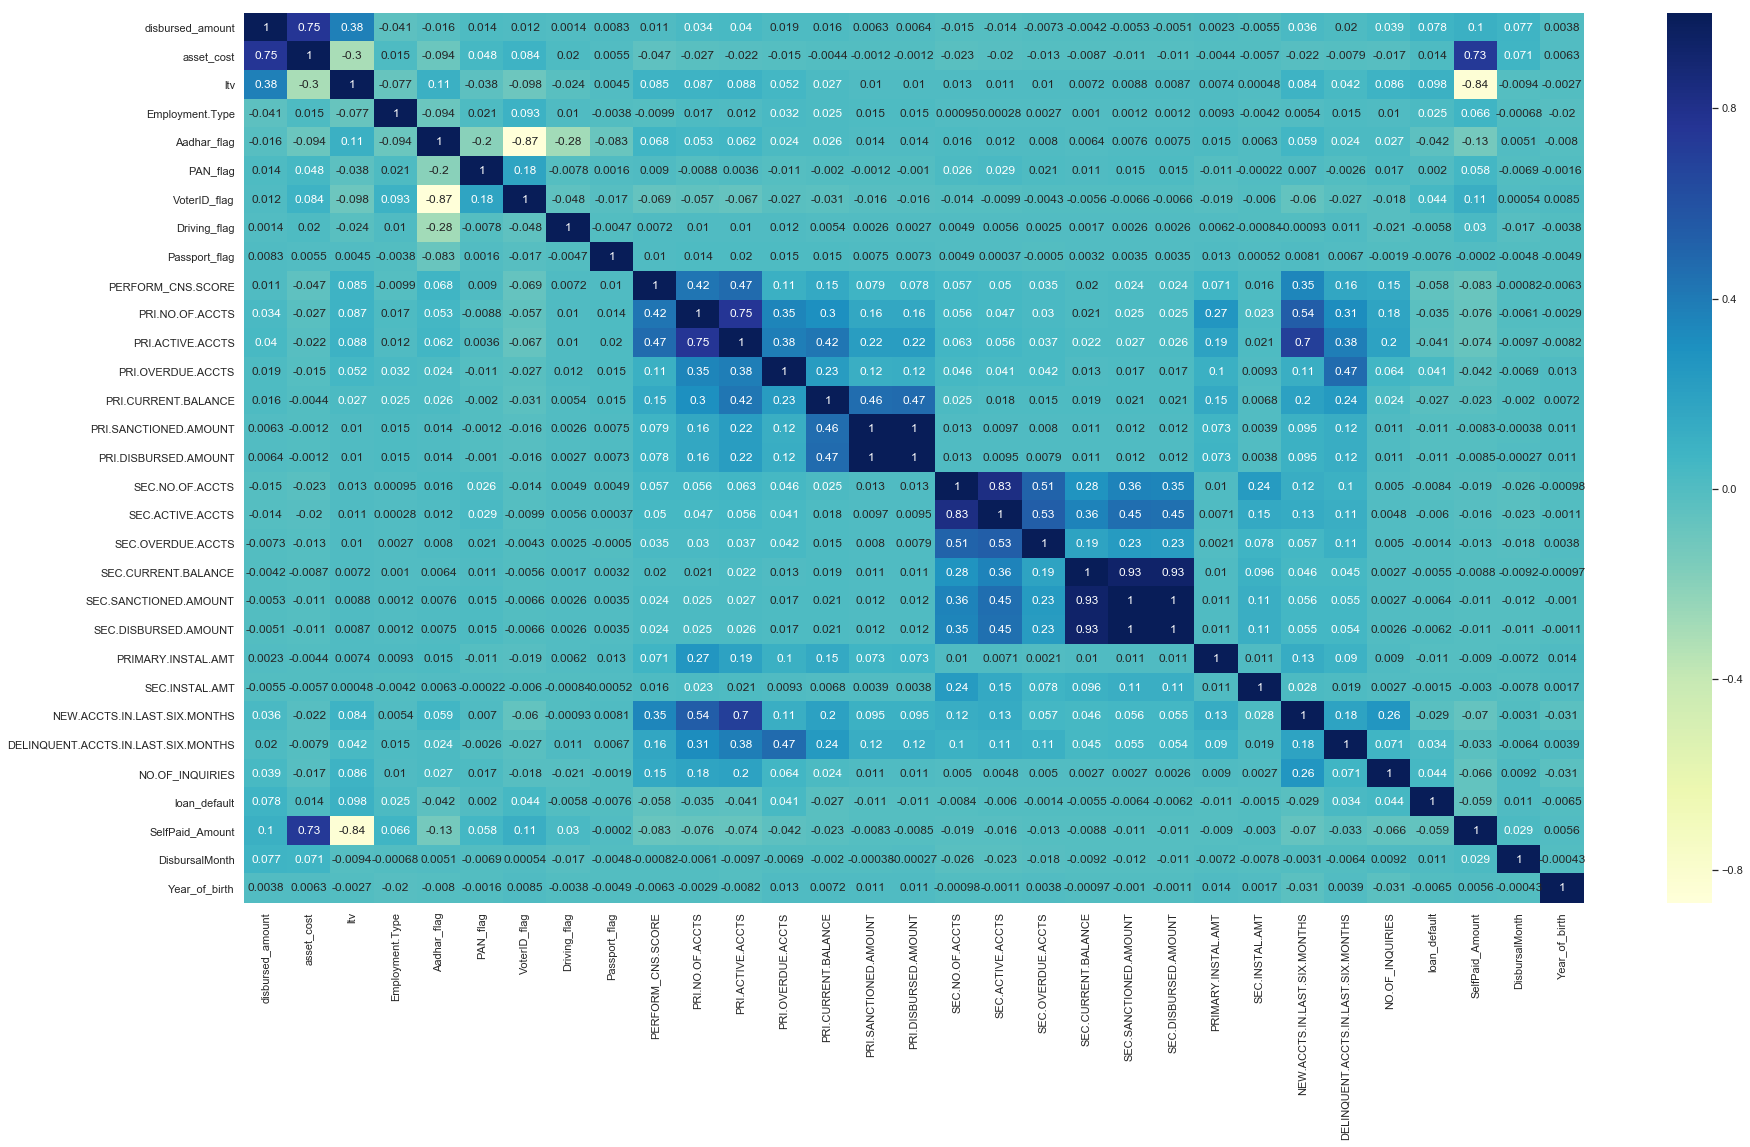

In [483]:
plt.figure(figsize = (30, 36))
plt.subplot(2, 1, 1)
sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Removing Multicollinearity

In [484]:

loan_df.drop(['PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT'], axis = 1, inplace = True)
loan_df.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,50578,58400,89.5500,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7822,3,1984
1,47145,65550,73.2300,2,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,0,0,0,0,0,1991,0,0,1,1,1,0,1,18405,9,1985
2,53278,61360,89.6300,2,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8082,1,1985
3,57513,66113,88.4800,2,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,31,0,0,0,0,1,1,1,8600,10,1993
4,52378,60300,88.3900,2,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7922,9,1977


In [485]:

loan_test_df.drop(['PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT'], axis = 1, inplace = True)

loan_test_df.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,53478,63558,86.5400,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10080,3,1984
1,55513,63163,89.4500,2,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,0,0,0,0,0,5605,0,1,0,0,1,1,7650,9,1985
2,65282,84320,79.9300,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19038,1,1985
3,46905,63896,76.5800,2,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,0,0,0,0,0,0,0,0,0,2,2,0,16991,10,1993
4,51428,63896,86.0800,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12468,9,1977


In [486]:
loan_test_df.shape

(112392, 31)

In [487]:
loan_df.shape

(233154, 32)

In [488]:
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [489]:
loan_df['Employment.Type'].unique()

array([1, 2, 0], dtype=int64)

In [490]:
#loan_df['Employment.Type'] = loan_df['Employment.Type'].map({'Salaried':1, 'Self employed':0})

#loan_test_df['Employment.Type'] = loan_test_df['Employment.Type'].map({'Salaried':1, 'Self employed':0})

In [491]:
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

#loan_df.drop(labels = ['PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace = True)
#loan_df.head()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [492]:
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

In [493]:
loan_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [494]:
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

#loan_test_df.drop(labels = ['PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace = True)
#loan_test_df.head()

No Bureau History Available                                57893
C-Very Low Risk                                             7825
A-Very Low Risk                                             7559
D-Very Low Risk                                             5114
B-Very Low Risk                                             4495
M-Very High Risk                                            4032
K-High Risk                                                 3864
F-Low Risk                                                  3691
H-Medium Risk                                               3287
I-Medium Risk                                               2703
E-Low Risk                                                  2572
G-Low Risk                                                  1807
J-High Risk                                                 1778
Not Scored: No Activity seen on the customer (Inactive)     1361
Not Scored: Not Enough Info available on the customer       1268
Not Scored: Sufficient Hi

In [495]:
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

In [496]:
loan_test_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

0    63017
5    24993
4     8070
3     5990
2     5642
1     4680
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [497]:
loan_df['disbursed_amount'] = np.log1p(loan_df['disbursed_amount'])
loan_df['ltv'] = np.log1p(loan_df['ltv'])
loan_df['asset_cost'] = np.log1p(loan_df['asset_cost'])
loan_df['SelfPaid_Amount'] = np.log1p(loan_df['SelfPaid_Amount'])

loan_df['PRIMARY.INSTAL.AMT'] = np.log1p(loan_df['PRIMARY.INSTAL.AMT'])
loan_df['SEC.INSTAL.AMT'] = np.log1p(loan_df['SEC.INSTAL.AMT'])

loan_df['PRI.NO.OF.ACCTS'] = np.log1p(loan_df['PRI.NO.OF.ACCTS'])
loan_df['PRI.ACTIVE.ACCTS'] = np.log1p(loan_df['PRI.ACTIVE.ACCTS'])
loan_df['PRI.OVERDUE.ACCTS'] = np.log1p(loan_df['PRI.OVERDUE.ACCTS'])
loan_df['PRI.CURRENT.BALANCE'] = np.log1p(loan_df['PRI.CURRENT.BALANCE'])
loan_df['PRI.DISBURSED.AMOUNT'] = np.log1p(loan_df['PRI.DISBURSED.AMOUNT'])

loan_df['SEC.NO.OF.ACCTS'] = np.log1p(loan_df['SEC.NO.OF.ACCTS'])
loan_df['SEC.ACTIVE.ACCTS'] = np.log1p(loan_df['SEC.ACTIVE.ACCTS'])
loan_df['SEC.OVERDUE.ACCTS'] = np.log1p(loan_df['SEC.OVERDUE.ACCTS'])
loan_df['SEC.CURRENT.BALANCE'] = np.log1p(loan_df['SEC.CURRENT.BALANCE'])
loan_df['SEC.DISBURSED.AMOUNT'] = np.log1p(loan_df['SEC.DISBURSED.AMOUNT'])

loan_df['PERFORM_CNS.SCORE'] = np.log1p(loan_df['PERFORM_CNS.SCORE'])


In [498]:
loan_df.head(20)

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,10.8313,10.9751,4.5059,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,8.9648,3,1984
1,10.7610,11.0906,4.3072,2,1,0,0,0,0,6.3953,3,0.6931,0.6931,0.6931,10.2256,10.8238,0.0000,0.0000,0.0000,0.0000,0.0000,7.5969,0.0000,0,1,1,1,0,1,9.8204,9,1985
2,10.8833,11.0245,4.5068,2,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,8.9975,1,1985
3,10.9598,11.0991,4.4940,2,1,0,0,0,0,5.7236,1,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.4657,0.0000,0,0,0,1,1,1,9.0596,10,1993
4,10.8663,11.0071,4.4930,2,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,1,1,8.9775,9,1977
5,10.9062,11.0333,4.5071,2,1,0,0,0,0,6.7166,5,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.2064,0.0000,0,0,1,2,0,0,8.9076,9,1990
6,10.7440,11.0268,4.3492,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,9.6259,9,1988
7,10.6896,11.0333,4.2890,1,1,0,0,0,0,2.8904,0,0.6931,0.6931,0.0000,11.1966,11.2186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,9.7985,9,1989
8,10.8914,11.0345,4.5060,2,1,0,0,0,0,6.5779,5,0.6931,0.6931,0.0000,nan,12.8087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,4,4,1,0,9.0193,5,1991
9,10.8705,11.0236,4.4768,1,0,0,1,0,0,6.7081,5,0.6931,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.8667,0.0000,0,0,1,1,0,0,9.0708,9,2068


In [499]:

pd.options.mode.use_inf_as_na = True
loan_df['PRI.CURRENT.BALANCE'] = loan_df['PRI.CURRENT.BALANCE'].fillna(loan_df['PRI.CURRENT.BALANCE'].mean())
loan_df['SEC.CURRENT.BALANCE'] = loan_df['SEC.CURRENT.BALANCE'].fillna(loan_df['SEC.CURRENT.BALANCE'].mean())

loan_df.head(20)

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,10.8313,10.9751,4.5059,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,8.9648,3,1984
1,10.7610,11.0906,4.3072,2,1,0,0,0,0,6.3953,3,0.6931,0.6931,0.6931,10.2256,10.8238,0.0000,0.0000,0.0000,0.0000,0.0000,7.5969,0.0000,0,1,1,1,0,1,9.8204,9,1985
2,10.8833,11.0245,4.5068,2,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,8.9975,1,1985
3,10.9598,11.0991,4.4940,2,1,0,0,0,0,5.7236,1,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.4657,0.0000,0,0,0,1,1,1,9.0596,10,1993
4,10.8663,11.0071,4.4930,2,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,1,1,8.9775,9,1977
5,10.9062,11.0333,4.5071,2,1,0,0,0,0,6.7166,5,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.2064,0.0000,0,0,1,2,0,0,8.9076,9,1990
6,10.7440,11.0268,4.3492,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,9.6259,9,1988
7,10.6896,11.0333,4.2890,1,1,0,0,0,0,2.8904,0,0.6931,0.6931,0.0000,11.1966,11.2186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,9.7985,9,1989
8,10.8914,11.0345,4.5060,2,1,0,0,0,0,6.5779,5,0.6931,0.6931,0.0000,4.3697,12.8087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,4,4,1,0,9.0193,5,1991
9,10.8705,11.0236,4.4768,1,0,0,1,0,0,6.7081,5,0.6931,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.8667,0.0000,0,0,1,1,0,0,9.0708,9,2068


In [500]:
loan_test_df['disbursed_amount'] = np.log1p(loan_test_df['disbursed_amount'])
loan_test_df['ltv'] = np.log1p(loan_test_df['ltv'])
loan_test_df['asset_cost'] = np.log1p(loan_test_df['asset_cost'])
loan_test_df['SelfPaid_Amount'] = np.log1p(loan_test_df['SelfPaid_Amount'])

loan_test_df['PRIMARY.INSTAL.AMT'] = np.log1p(loan_test_df['PRIMARY.INSTAL.AMT'])
loan_test_df['SEC.INSTAL.AMT'] = np.log1p(loan_test_df['SEC.INSTAL.AMT'])

loan_test_df['PRI.NO.OF.ACCTS'] = np.log1p(loan_test_df['PRI.NO.OF.ACCTS'])
loan_test_df['PRI.ACTIVE.ACCTS'] = np.log1p(loan_test_df['PRI.ACTIVE.ACCTS'])
loan_test_df['PRI.OVERDUE.ACCTS'] = np.log1p(loan_test_df['PRI.OVERDUE.ACCTS'])
loan_test_df['PRI.CURRENT.BALANCE'] = np.log1p(loan_test_df['PRI.CURRENT.BALANCE'])
loan_test_df['PRI.DISBURSED.AMOUNT'] = np.log1p(loan_test_df['PRI.DISBURSED.AMOUNT'])

loan_test_df['SEC.NO.OF.ACCTS'] = np.log1p(loan_test_df['SEC.NO.OF.ACCTS'])
loan_test_df['SEC.ACTIVE.ACCTS'] = np.log1p(loan_test_df['SEC.ACTIVE.ACCTS'])
loan_test_df['SEC.OVERDUE.ACCTS'] = np.log1p(loan_test_df['SEC.OVERDUE.ACCTS'])
loan_test_df['SEC.CURRENT.BALANCE'] = np.log1p(loan_test_df['SEC.CURRENT.BALANCE'])
loan_test_df['SEC.DISBURSED.AMOUNT'] = np.log1p(loan_test_df['SEC.DISBURSED.AMOUNT'])

loan_test_df['PERFORM_CNS.SCORE'] = np.log1p(loan_test_df['PERFORM_CNS.SCORE'])


In [501]:
pd.options.mode.use_inf_as_na = True
loan_test_df['PRI.CURRENT.BALANCE'] = loan_test_df['PRI.CURRENT.BALANCE'].fillna(loan_test_df['PRI.CURRENT.BALANCE'].mean())
loan_test_df['SEC.CURRENT.BALANCE'] = loan_test_df['SEC.CURRENT.BALANCE'].fillna(loan_test_df['SEC.CURRENT.BALANCE'].mean())

loan_test_df.head(20)

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,SelfPaid_Amount,DisbursalMonth,Year_of_birth
0,10.8870,11.0597,4.4721,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.2184,3,1984
1,10.9244,11.0535,4.5048,2,1,0,0,0,0,6.6201,5,1.0986,0.6931,0.0000,10.6896,10.7951,0.0000,0.0000,0.0000,0.0000,0.0000,8.6316,0.0000,1,0,0,1,1,8.9426,9,1985
2,11.0865,11.3424,4.3936,1,1,1,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.8542,1,1985
3,10.7559,11.0650,4.3513,2,1,0,0,0,0,2.7081,0,0.6931,0.6931,0.6931,11.7942,12.4490,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,2,2,0,9.7405,10,1993
4,10.8480,11.0650,4.4668,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.4310,9,1977
5,10.9623,11.1734,4.4502,2,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,1,9.5145,9,1990
6,10.7897,11.0472,4.4290,1,1,0,0,0,0,5.9506,2,1.7918,1.6094,1.0986,12.7259,12.7168,0.0000,0.0000,0.0000,0.0000,0.0000,7.6606,0.0000,0,0,1,2,0,9.5645,9,1988
7,10.7943,11.0650,4.4113,1,1,1,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.6260,9,1989
8,10.8257,11.0650,4.4230,1,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.5180,5,1991
9,10.8523,11.1191,4.4134,0,1,0,0,0,0,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,9.6673,9,2068


##  Modelling

In [502]:
loan_df.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [503]:
# Separate majority and minority classes
df_majority = loan_df[loan_df.loan_default==0]
df_minority = loan_df[loan_df.loan_default==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=182543,    # to match majority class
                                 random_state=123) # reproducible results

#df_majority_downsampled = resample(df_majority, 
#                                 replace=False,    # sample without replacement
#                                 n_samples=50611,     # to match minority class
#                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
loan_df_unsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
loan_df_unsampled.loan_default.value_counts()

1    182543
0    182543
Name: loan_default, dtype: int64

In [504]:
# create x and y train
X = loan_df_unsampled.drop('loan_default', axis=1)
y = loan_df_unsampled[['loan_default']]


In [505]:
#x_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel()) 

# checking the shape of x_resample and y_resample
#print("Shape of x:", x_resample.shape)
#print("Shape of y:", y_resample.shape)

In [506]:
# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(346831, 31)
(346831, 1)
(18255, 31)
(18255, 1)


In [507]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

loan_test_df = sc.transform(loan_test_df)

## AdaBoost

In [514]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [515]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=600, random_state=None)

In [516]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.49984458, 0.50015542],
       [0.49778883, 0.50221117],
       [0.50633044, 0.49366956],
       [0.49863856, 0.50136144],
       [0.49776641, 0.50223359],
       [0.49850479, 0.50149521],
       [0.49266919, 0.50733081],
       [0.50223711, 0.49776289],
       [0.5035778 , 0.4964222 ],
       [0.49860186, 0.50139814]])

In [517]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.6517761026521267

In [518]:
test_preds = adaboost_model_1.predict(loan_test_df)
test_preds[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [519]:
sub = pd.DataFrame({'UniqueID': test_uniqueID['UniqueID'], 'loan_default': test_preds})
sub = sub.reindex(columns=['UniqueID', 'loan_default'])

filename = 'submission_ada.csv'

sub.to_csv(filename, index=False, sep=",")

## XG Boost

In [445]:
# fit model on training data with default hyperparameters
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [446]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = xgb.predict_proba(X_test)
y_pred[:10]

array([[0.5256609 , 0.47433913],
       [0.4337482 , 0.5662518 ],
       [0.6571741 , 0.3428259 ],
       [0.4607494 , 0.5392506 ],
       [0.3878535 , 0.6121465 ],
       [0.40753162, 0.5924684 ],
       [0.38135272, 0.6186473 ],
       [0.560833  , 0.43916705],
       [0.5699986 , 0.43000138],
       [0.34023553, 0.65976447]], dtype=float32)

In [447]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 64.81%


In [448]:
test_preds = xgb.predict(loan_test_df)
test_preds[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [449]:
sub = pd.DataFrame({'UniqueID': test_uniqueID['UniqueID'], 'loan_default': test_preds})
sub = sub.reindex(columns=['UniqueID', 'loan_default'])

filename = 'submission_xgb_1.csv'

sub.to_csv(filename, index=False, sep=",")

## Light Boost Classifier

Training Accuracy:  0.6251146993165975
Testing Accuarcy:  0.6207099619271961
              precision    recall  f1-score   support

           0       0.63      0.56      0.59     36282
           1       0.61      0.68      0.64     36736

   micro avg       0.62      0.62      0.62     73018
   macro avg       0.62      0.62      0.62     73018
weighted avg       0.62      0.62      0.62     73018



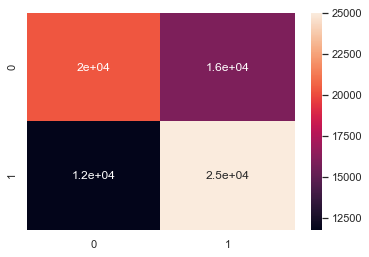

In [450]:
# light boost classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

print("Training Accuracy: ", model_lgb.score(X_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [451]:
y_pred_lgb = model_lgb.predict(loan_test_df)

In [452]:
sub = pd.DataFrame({'UniqueID': test_uniqueID['UniqueID'], 'loan_default': test_preds})
sub = sub.reindex(columns=['UniqueID', 'loan_default'])

filename = 'submission_lgb_1.csv'

sub.to_csv(filename, index=False, sep=",")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Training Accuracy: ", rfc.score(X_train, y_train))
print('Testing Accuarcy: ', rfc.score(X_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
y_pred_1 = rfc.predict_proba(X_test)
y_pred_1[:10]

In [ ]:
acc = metrics.roc_auc_score(y_test, y_pred_1[:, 1])
acc

In [ ]:
y_pred_rfc = rfc.predict(loan_test_df)

sub_rfc = pd.DataFrame({'UniqueID': test_uniqueID['UniqueID'], 'loan_default': test_preds})
sub_rfc = sub_rfc.reindex(columns=['UniqueID', 'loan_default'])

filename = 'submission_rfc_1.csv'

sub_rfc.to_csv(filename, index=False, sep=",")